# **Estudio sobre la educacion y su relacion con el exito laboral**

***Autor***: Salvador Chacon

## **Definicion del problema**

El siguiente DataSet trata acerca de la relación entre el rendimiento académico y el éxito profesional en los Estados Unidos. Incluye registros de los antecedentes educativos, las habilidades y los resultados profesionales de los estudiantes con el objetivo de encontrar una relacion entre el exito laboral y la educacion.

Preguntas como:

* ¿Los estudiantes con más pasantías o certificaciones consiguen mejores salarios o más oportunidades?
* ¿Los estudiantes con altos puntajes en SAT y GPA tienen más éxito en términos de empleo y satisfacción?
* ¿Cómo influye el ranking de la universidad en el salario inicial y la cantidad de ofertas de trabajo?
* ¿Las habilidades blandas y el networking tienen un impacto significativo en las oportunidades de empleo?

Serviran de guia para el analisis de este DataSet, con la intencion de responder a hipotesis como:

* Los estudiantes de universidades mejor rankeadas reciben mayores salarios iniciales
* Los estudiantes con más pasantías y certificaciones tienen más ofertas de trabajo.
* Los graduados de carreras técnicas (por ejemplo, Ciencias de la Computación) tienen un salario inicial más alto en comparación con los graduados de carreras humanas.
* El salario inicial entre hombres y mujeres graduados es aproximadamente igual


## **Carga y preparacion de datos**

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
url = "https://raw.githubusercontent.com/salvador551998/Salvador-Chacon-/main/Educacion.xlsx"

In [3]:
Educacion_df = pd.read_excel(url , engine='openpyxl')

### **Exploracion inicial**

In [ ]:
Educacion_df.describe()

,tudent_ID,Age,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Work_Life_Balance
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,2500.500000,23.442200,273.333200,1253.832000,504.335600,275.073000,1.982200,4.562800,2.512200,5.546000,5.538000,2.488800,5.056354e+05,5.578000,3.015800,5.482400
std,1443.520003,3.473712,97.419568,203.228954,291.060011,97.423859,1.408219,2.872927,1.703183,2.851159,2.850084,1.711859,1.449496e+05,2.871997,1.417446,2.883427
min,1.000000,18.000000,20.000000,900.000000,1.000000,20.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.500000e+05,1.000000,1.000000,1.000000
25%,1250.750000,20.000000,234.750000,1076.000000,256.000000,235.000000,1.000000,2.000000,1.000000,3.000000,3.000000,1.000000,4.020000e+05,3.000000,2.000000,3.000000
50%,2500.500000,23.000000,288.000000,1257.000000,501.500000,292.000000,2.000000,5.000000,3.000000,6.000000,6.000000,2.000000,5.030000e+05,6.000000,3.000000,6.000000
75%,3750.250000,26.000000,344.000000,1432.000000,759.000000,346.000000,3.000000,7.000000,4.000000,8.000000,8.000000,4.000000,6.050000e+05,8.000000,4.000000,8.000000
max,5000.000000,29.000000,399.000000,1600.000000,1000.000000,399.000000,4.000000,9.000000,5.000000,10.000000,10.000000,5.000000,1.010000e+06,10.000000,5.000000,10.000000


In [ ]:
Educacion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   tudent_ID              5000 non-null   int64 
 1   Age                    5000 non-null   int64 
 2   Gender                 5000 non-null   object
 3   High_School_GPA        5000 non-null   int64 
 4   SAT_Score              5000 non-null   int64 
 5   University_Ranking     5000 non-null   int64 
 6   University_GPA         5000 non-null   int64 
 7   Field_of_Study         5000 non-null   object
 8   Internships_Completed  5000 non-null   int64 
 9   Projects_Completed     5000 non-null   int64 
 10  Certifications         5000 non-null   int64 
 11  Soft_Skills_Score      5000 non-null   int64 
 12  Networking_Score       5000 non-null   int64 
 13  Job_Offers             5000 non-null   int64 
 14  Starting_Salary        5000 non-null   int64 
 15  Career_Satisfaction  

In [4]:
#Se remueve la columna de ID ya que no impacta en el analisis y entorpece los calculos.
Educacion_df.drop(columns=["tudent_ID"], inplace= True)

### **Analisis de outliers en el DataSet**

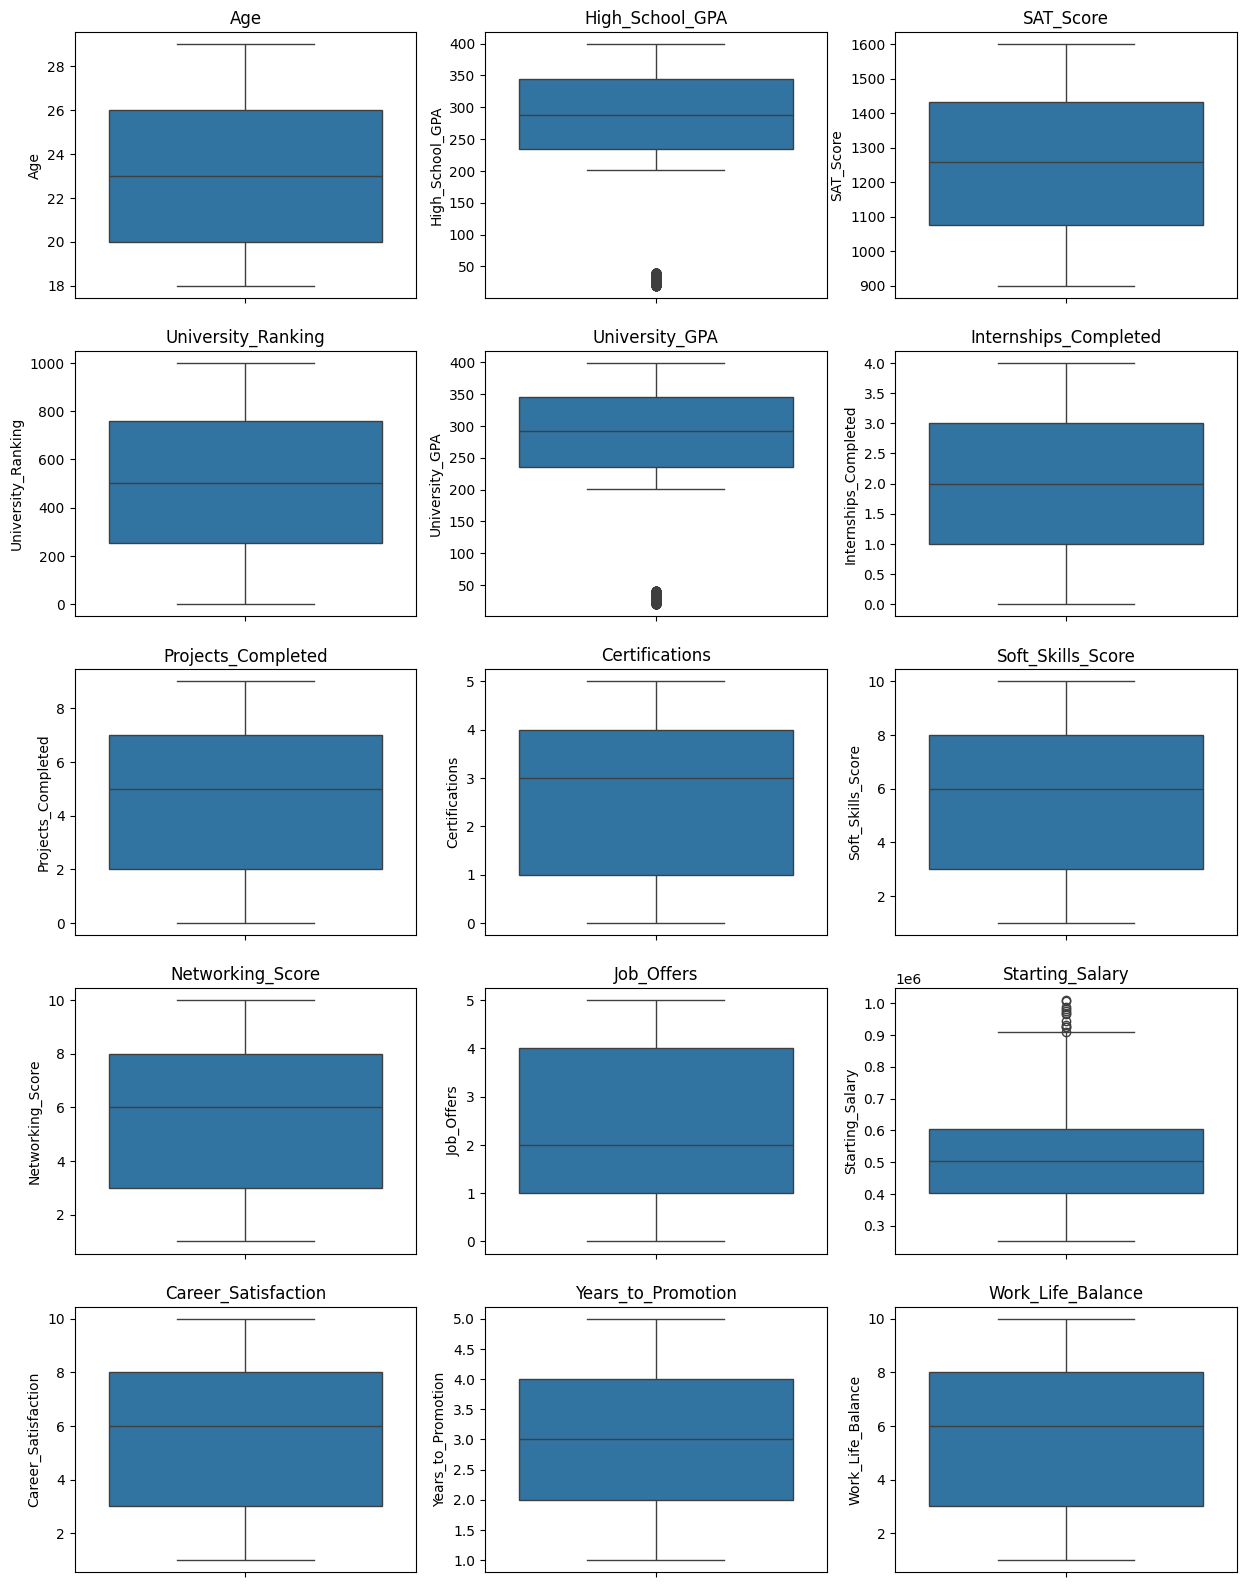

In [5]:
Educacion_numerica_df = Educacion_df.select_dtypes(include=['float', 'int'])

n_cols = 3
n_rows = (len(Educacion_numerica_df.columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 20))

for i, column in enumerate(Educacion_numerica_df.columns):
    row = i // n_cols
    col = i % n_cols
    sns.boxplot(data = Educacion_numerica_df[column], ax = axes[row, col])
    axes[row, col].set_title(column)

In [8]:
#Calculo el % que representan los outliers en cada una de las columnas en donde se detectaron

contador1 = (Educacion_df['High_School_GPA'] < 100).sum()
contador2 = (Educacion_df['University_GPA'] < 100).sum()
contador3 = (Educacion_df['Starting_Salary'] > 900000).sum()
print("El % que representan los outliers en High_School_GPA es: ", (contador1/5000)*100,"%","\nEl % que representan los outliers en University_GPA es: ", (contador2/5000)*100,"%",  "\nEl % que representan los outliers en Starting_Salary es: ", (contador3/5000)*100,"%")

El % que representan los outliers en High_School_GPA es:  9.879999999999999 % 
El % que representan los outliers en University_GPA es:  9.78 % 
El % que representan los outliers en Starting_Salary es:  0.38 %


Se puede ver en los graficos que tanto el "Starting_Salary", el "High_School_GPA" y "University_GPA" poseen outliers, el primero en el umbral superior y los otros 2 en el umbral inferior. Esto puede distorcionar el analisis y la correlacion entre las variables por lo que para lograr una mejor interpretacion de los datos, se toma la desicion de eliminarlos, siendo ademas que los mismos representan menos del 10% de los datos en cada caso (Que si bien es informacion que no se esta considerando, se opta por este camino).

In [9]:
#Se remueven los outliers para una mejor interpretacion de los datos. Se opta por usar 2 veces la desviacion estandar ya que con 3 todavia seguian figurando outliers.
Educacion_df = Educacion_df[Educacion_df['Starting_Salary'] < Educacion_df['Starting_Salary'].mean() + 2 * Educacion_df['Starting_Salary'].std()]
Educacion_df = Educacion_df[Educacion_df['High_School_GPA'] > Educacion_df['High_School_GPA'].mean() - 2 * Educacion_df['High_School_GPA'].std()]
Educacion_df = Educacion_df[Educacion_df['University_GPA'] > Educacion_df['University_GPA'].mean() - 2 * Educacion_df['University_GPA'].std()]

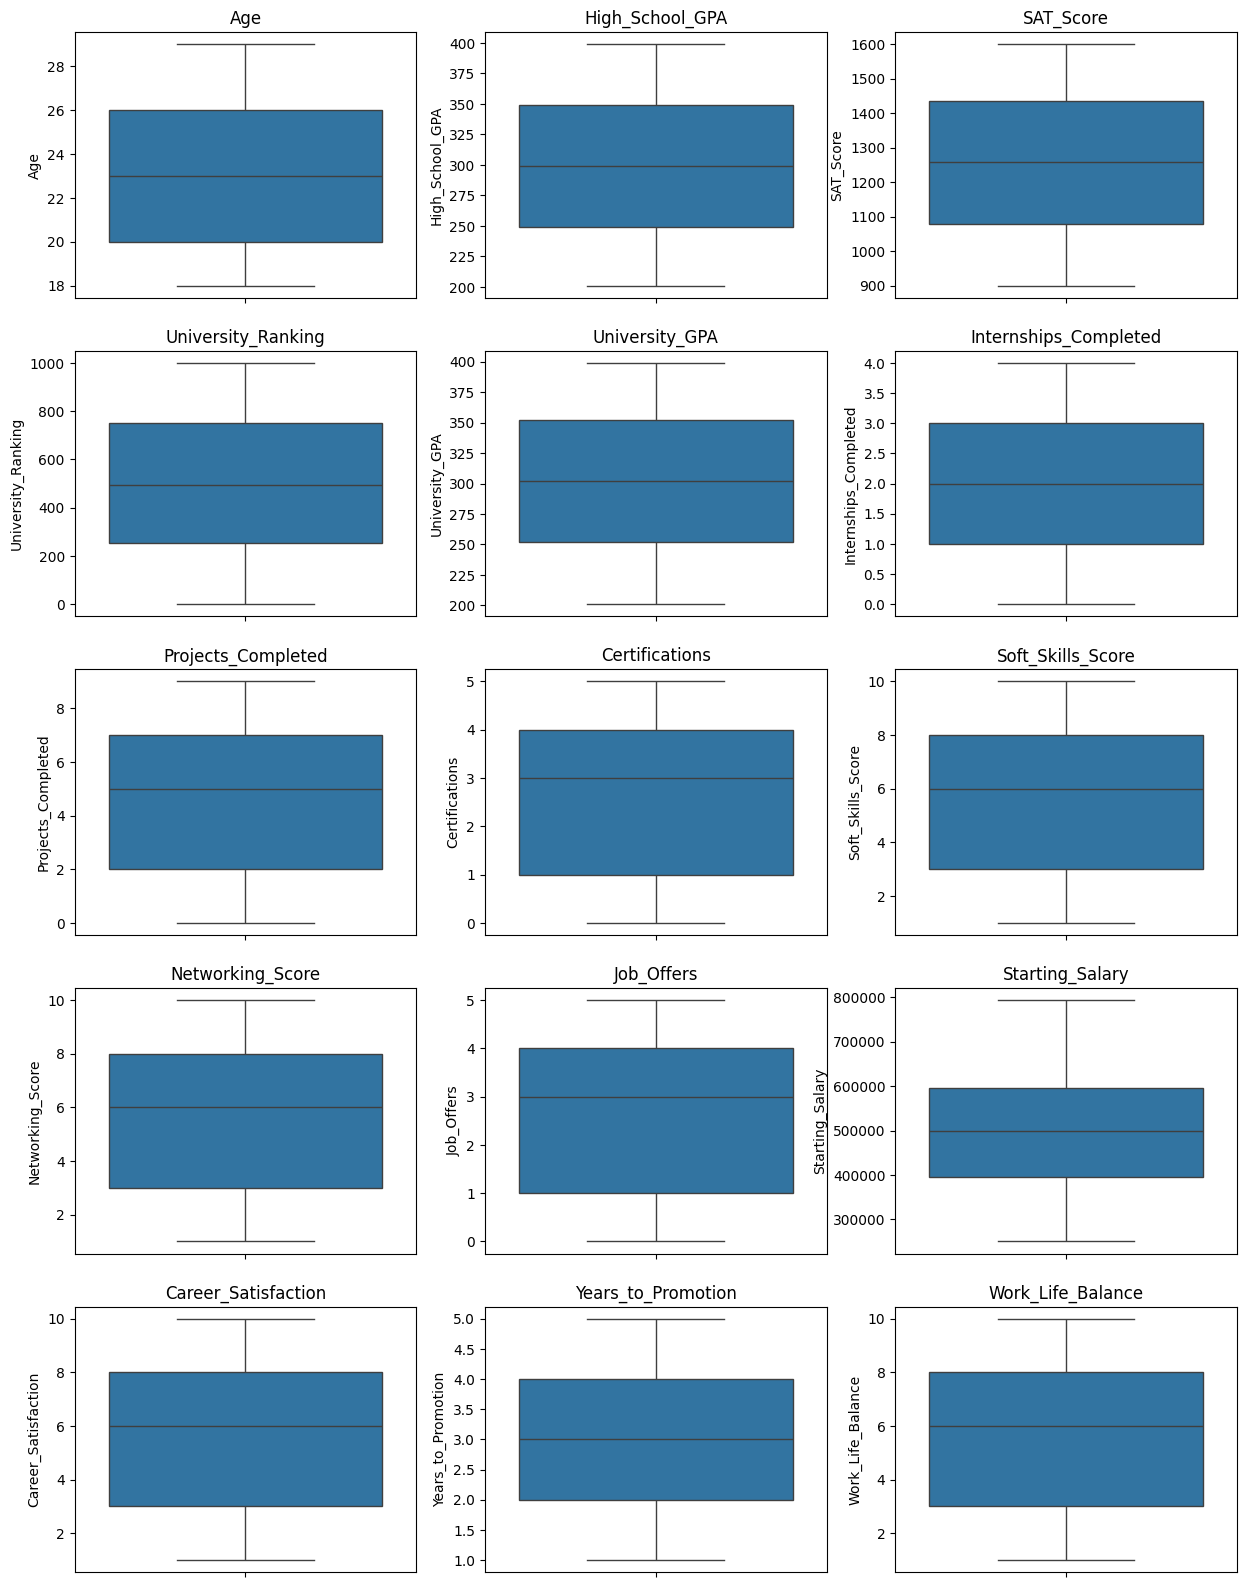

In [10]:
#Se vuelve a visualizar los graficos con los outliers removidos

Educacion_numerica_df = Educacion_df.select_dtypes(include=['float', 'int'])

n_cols = 3
n_rows = (len(Educacion_numerica_df.columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 20))

for i, column in enumerate(Educacion_numerica_df.columns):
    row = i // n_cols
    col = i % n_cols
    sns.boxplot(data = Educacion_numerica_df[column], ax = axes[row, col])
    axes[row, col].set_title(column)

## **EDA (Analisis exploratorio de datos)**

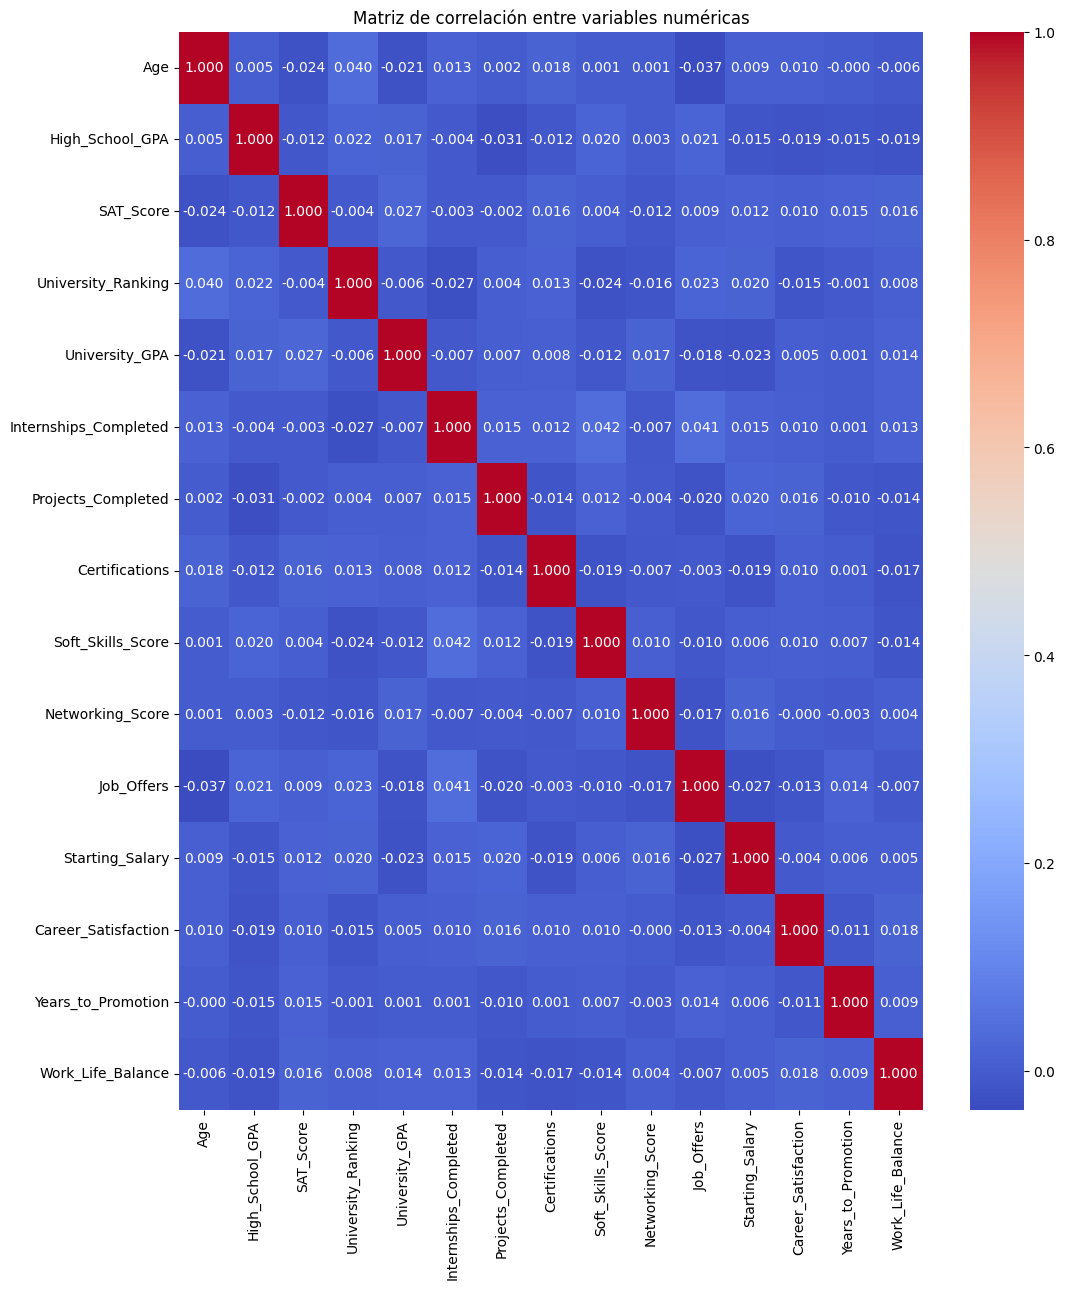

In [11]:
#Se visualiza una matriz de correlacion para ver la correlacion que existe entre las variables

fig = plt.figure(figsize = (12, 14))
Educacion_numerica_df= Educacion_df.select_dtypes(include=['float', 'int'])
sns.heatmap(Educacion_numerica_df.corr(), annot = True, fmt=".3f", cmap="coolwarm",)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

De la anterior matriz de correlacion se pueden sacar las siguientes conclusiones rapidamente:



*   El salario inicial esta mayormente relacionado con los proyectos completados, el ranking de la universidad y las pasantias completadas. E inversamente relacionado con el GPA de la universidad y del secundario
*   Hay una mayor relacion entre el GPA de la secundaria con la oferta de trabajos que el GPA de la universidad y la oferta de trabajos, que es mas inversamente proporcional. Sin embargo la mayor relacion con las ofertas de trabajo es la cantidad de pasantias realizadas, lo cual habla de que se valora mas la experiencia.
*  El ranking de la universidad se relaciona con el salario inicial, la cantidad de ofertas de trabajo y con el GPA de la secundaria.

Todo esto nos da un indicio de que hay una mayor afinidad entre la experiencia que la persona tenga y la universidad a la que va con su salario y sus ofertas de trabajo, mas que su GPA de universidad o secundario






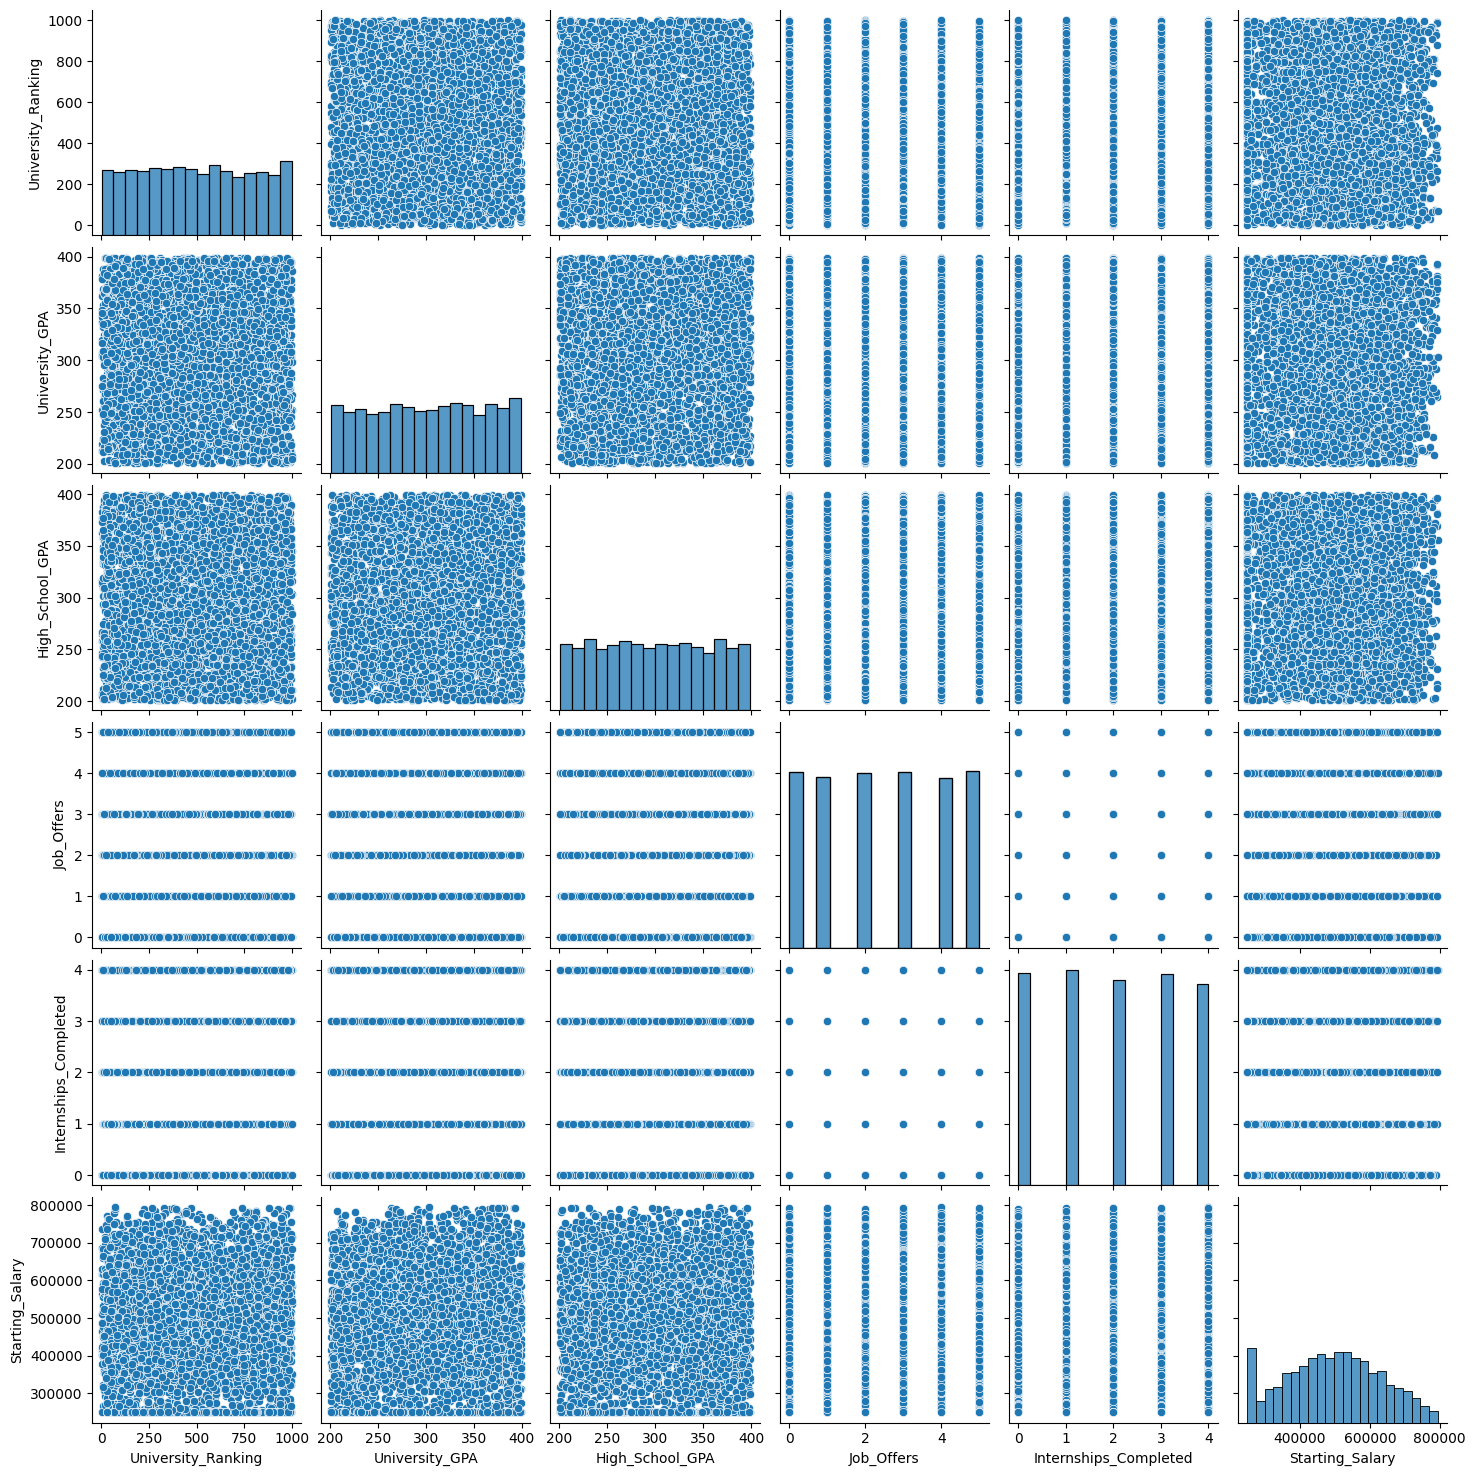

In [12]:
#Se genera scatter plots para las variables mas influyentes determinadas de la anterior matriz de correlacion con el objetivo de
# visualizar relaciones entre variables, detectar correlaciones y analizar distribuciones individuales de manera general.

sns.pairplot(Educacion_df[['University_Ranking', 'University_GPA', 'High_School_GPA','Job_Offers','Internships_Completed', 'Starting_Salary']])
plt.show()

De los anteriores graficos podemos observar que:


* Cuantas más pasantías tenga un estudiante, mayor será su salario inicial. Esto confirma que la experiencia laboral durante los estudios tiene un efecto positivo en las perspectivas de carrera.
* Hay una distribución uniforme en el ranking universitario, lo que sugiere que un alto ranking universitario no siempre garantiza un alto promedio académico (GPA) entre los estudiantes.
* La mayoría de los graduados reciben un salario inicial en el rango de 40,000 a 75,000

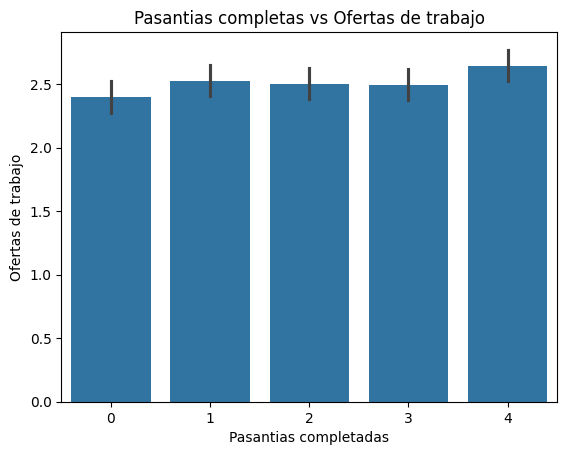

In [52]:
#Se visualiza especificamente la relacion entre las pasantias realizadas y las ofertas de trabajo

sns.barplot(x="Internships_Completed",y="Job_Offers",data=Educacion_df)
plt.xlabel("Pasantias completadas")
plt.ylabel('Ofertas de trabajo')
plt.title('Pasantias completas vs Ofertas de trabajo')
plt.show()

Se puede ver que existe una tendencia creciente entre la cantidad de pasantias completadas y las ofertas de trabajo, lo cual es otro indicador de la ventaja del trabajo durante los estudios frente a una persona que no posee experiencia.

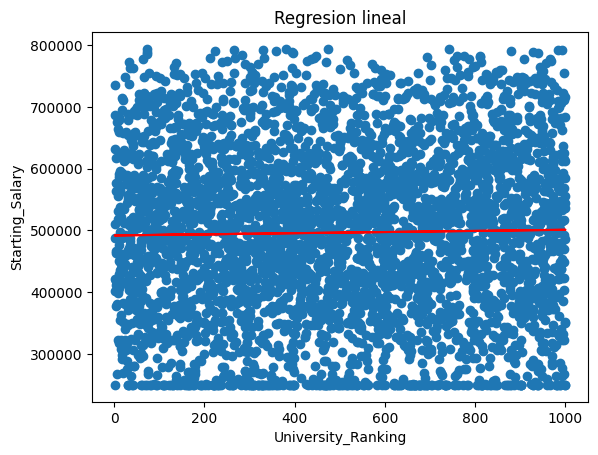

In [13]:
#Se analiza en profundidad la relacion existente entre el ranking de la universidad y el salario inicial. Utilizando la prueba estadistica de regresion lineal

model = LinearRegression()
X = Educacion_df['University_Ranking'].values.reshape(-1, 1)
y = Educacion_df['Starting_Salary']
model.fit(X, y)
y_pred = model.predict(X)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('University_Ranking')
plt.ylabel('Starting_Salary')
plt.title('Regresion lineal')
plt.show()

Podemos observar que los estudiantes de universidades más prestigiosas (con un valor de University_Ranking más bajo) tienden a obtener salarios iniciales más altos, pero la relación no es lineal, ya que existe una gran variabilidad.

In [14]:
#Se utiliza el RMSE para evaluar la presicion del modelo utilizado

mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
print("RMSE del modelo:", rmse)
print("El % que representa el RSME de nuestro modelo es del: ", (rmse/800000)*100,"%")

RMSE del modelo: 135350.20333056827
El % que representa el RSME de nuestro modelo es del:  16.918775416321033 %


Dado que nuestro rango de valores para la variable "y" van entre 0 y 800000 aproximadamente, un RMSE de 135397 representa un error promedio de aproximadamente 135397 unidades. Comparado con el rango de valores es alrededor del 17%. Si bien no es un valor extremadamente bajo, pero tampoco es un error desmesurado, el desempeño esta en un punto intermedio comparado con el rango de valores con los que trabajamos. Quizas existe algun otro modelo que se podria adptar mejor a los datos.



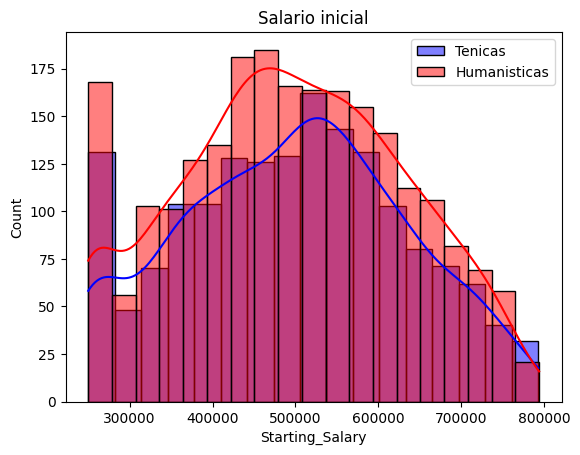

In [15]:
#Se profundiza el analisis en cuanto al salario inicial, desglozandolo por el tipo de carreras, es decir, carreras mas "Tecnicas" y carreras mas "Humanisiticas"

Tecnicas = Educacion_df[Educacion_df['Field_of_Study'].isin(['Computer Science', 'Mathematics', 'Engineering'])]['Starting_Salary']
Humanisticas = Educacion_df[Educacion_df['Field_of_Study'].isin(['Arts', 'Law', 'Medicine', 'Business'])]['Starting_Salary']
sns.histplot(Tecnicas, color='blue', label='Tenicas', kde=True)
sns.histplot(Humanisticas, color='red', label='Humanisticas', kde=True)
plt.legend()
plt.title('Salario inicial')
plt.show()

Para comprobar si realmente existe una diferencia entre los salarios de estudiantes de carreras humanisticas vs tenicas, se utiliza el metodo del p-value en el cual se plantea la siguiente hipotesis nula (H₀):

-Hipótesis nula (H₀): No hay diferencia significativa en los salarios entre ambas carreras.
-Hipótesis alternativa (H₁): Sí hay una diferencia significativa en los salarios



In [16]:
p_value_mannwhitney = stats.mannwhitneyu(Tecnicas, Humanisticas)
print(p_value_mannwhitney)

MannwhitneyuResult(statistic=np.float64(1922985.5), pvalue=np.float64(0.6681058778906215))


A pesar de que visualmente parece que existe una diferencia entre los salarios de los graduados de carreras tecnicas vs humanisticas, se obtuvo un valor p = 0,67. Por lo tanto, no hay motivos para rechazar H0, lo que significa que los salarios iniciales promedio entre los estudiantes de humanidades y técnicos son iguales.

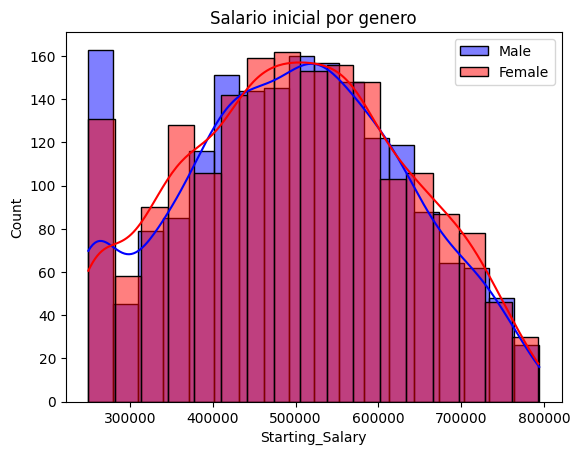

In [17]:
#Se realiza el mismo analisis pero ahora por genero

Educacion_df = Educacion_df[Educacion_df['Gender'].isin(['Male', 'Female'])]

Salario_hombre = Educacion_df[Educacion_df['Gender'] == 'Male']['Starting_Salary']
Salario_mujer = Educacion_df[Educacion_df['Gender'] == 'Female']['Starting_Salary']

sns.histplot(Salario_hombre, color='blue', label='Male', kde=True)
sns.histplot(Salario_mujer, color='red', label='Female', kde=True)
plt.legend()
plt.title('Salario inicial por genero')
plt.show()

Se plantea nuevamente el metodo p-value utilizando la siguiente hipotesis nula (H₀) para ver si existe diferencia entre los salarios iniciales entre hombres y muejres:

-Hipótesis nula (H₀): No hay diferencia significativa en los salarios entre hombres y mujeres.
-Hipótesis alternativa (H₁): Sí hay una diferencia significativa en los salarios

In [18]:
p_value_mannwhitney = stats.mannwhitneyu(Salario_hombre, Salario_mujer)
print(p_value_mannwhitney)

MannwhitneyuResult(statistic=np.float64(1787514.5), pvalue=np.float64(0.5151709886493604))


Siendo que el valor de p es de 0.51, no podemos decir que los salarios son distintos en conclusion los salarios son iguales.

## **Conclusiones finales**

Luego del analisis realizados, se vuelve sobre las hipotesis que nos planteamos en un inicio:

* **Los estudiantes de universidades mejor rankeadas reciben mayores salarios iniciales** --> Esto no es del todo cierto, si bien existe una relacion entre estas 2 variable y los estudiantes de de universidades mas prestigiosas tienden a obtener mejores salarios, no es una relacion lineal ya que existe una gran variabilidad.

* **Los estudiantes con más pasantías y certificaciones tienen más ofertas de trabajo** --> Esto es cierto, se pudo ver que existe una buena relacion entre la cantidad de ofertas de trabajo y la cantidad de pasantias realizadas y que a mayor cantidad de pasantias realizadas, mayor es la oferta de trabajo, es decir, se valora la experiencia, no asi con las certificaciones completadas.

* **Los graduados de carreras técnicas (por ejemplo, Ciencias de la Computación) tienen un salario inicial más alto en comparación con los graduados de carreras humanas** --> Esto termino siendo falso, como vimos anteriormente mediante el metodo del p-value, no existe razon para creer que los graduados de carreras tecnicas tienen salarios iniciales mas altos en comparacion con los de carreras humanisticas, si bien visualmente pareciera que si, pudimos determinar estadisticamente que no se puede afirmar esta diferencia.

* **El salario inicial entre hombres y mujeres graduados es aproximadamente igual** --> Como pudimos ver, tambien mediante el metodo del p-value, es salario inicial entre hombres y mujeres es aproximadamente igual.